![Portada](https://github.com/ispc-programador2022/FFNFF5/blob/main/recursos/MDSQL.png?raw=true "Proyecto Tecnologico Integrador ISPC 2022")
## Importamos Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leemos archivos generales

In [2]:
conv1= pd.read_excel("2021_racesCarreras.xlsx", index_col=0)
conv2= pd.read_excel("2021_drivers1Pilotos.xlsx", index_col=0)
conv3= pd.read_excel("2021_team1Equipos.xlsx", index_col=0)
conv4= pd.read_excel("2021_fastest-laps1Vueltas.xlsx", index_col=0)

## Limpieza y preparación de Datos
Comenzamos convirtiendo a csv y luego crearemos como `DataFrame` para su procesamiento posterior, previo a cargarlos en SQL. En esta para realziamos el proceso de limpiar y preparar los datos con Pandas para cada uno de los Dataset en cuestión.

In [3]:
# Convertimos a csv
conv1.to_csv("salida/2021_racesCarreras.csv", index=None, header=True)
conv2.to_csv("salida/2021_drivers1Pilotos.csv", index=None, header=True)
conv3.to_csv("salida/2021_team1Equipos.csv", index=None, header=True)
conv4.to_csv("salida/2021_fastest-laps1Vueltas.csv", index=None, header=True)

# Creamos DataFrames leyendo directo desde los csv generados
carreras= pd.DataFrame(pd.read_csv("salida/2021_racesCarreras.csv"))
pilotos= pd.DataFrame(pd.read_csv("salida/2021_drivers1Pilotos.csv"))
escuderia= pd.DataFrame(pd.read_csv("salida/2021_team1Equipos.csv"))
vuelta= pd.DataFrame(pd.read_csv("salida/2021_fastest-laps1Vueltas.csv"))

In [4]:
# Revisamos los datos para comproabr si existen datos nulos.
carreras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Grand Prix  22 non-null     object
 1   Date        22 non-null     object
 2   Winner      22 non-null     object
 3   Car         22 non-null     object
 4   Laps        22 non-null     int64 
 5   Time        22 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.2+ KB


In [5]:
carreras.dtypes

Grand Prix    object
Date          object
Winner        object
Car           object
Laps           int64
Time          object
dtype: object

In [6]:
# Comprobamos el nombre de columnas
carreras.columns

Index(['Grand Prix', 'Date', 'Winner', 'Car', 'Laps', 'Time'], dtype='object')

In [7]:
# Mostramos los primeros 5 registros por defecto
carreras.head()

,Grand Prix,Date,Winner,Car,Laps,Time
0,Bahrain,28 Mar 2021,Lewis Hamilton HAM,Mercedes,56,1:32:03.897
1,Emilia Romagna,18 Apr 2021,Max Verstappen VER,Red Bull Racing Honda,63,2:02:34.598
2,Portugal,02 May 2021,Lewis Hamilton HAM,Mercedes,66,1:34:31.421
3,Spain,09 May 2021,Lewis Hamilton HAM,Mercedes,66,1:33:07.680
4,Monaco,23 May 2021,Max Verstappen VER,Red Bull Racing Honda,78,1:38:56.820


Como estos archivos **no poseen datos nulos**, procederemos a modificar el nombre de las columnas y convertir la columna `Date` a un dato tipo fecha con el formato correspondiente.

In [8]:
# Cambiamos nombre de columnas
carreras.set_axis(["Carrera", "Fecha", "Ganador", "Auto", "Vueltas", "Tiempo"], axis=1, inplace=True)
carreras.columns

Index(['Carrera', 'Fecha', 'Ganador', 'Auto', 'Vueltas', 'Tiempo'], dtype='object')

In [9]:
# Convertimos la columna fecha al tipo de dato correpsondiente
carreras["Fecha"]= pd.to_datetime(carreras["Fecha"])
carreras.dtypes

Carrera            object
Fecha      datetime64[ns]
Ganador            object
Auto               object
Vueltas             int64
Tiempo             object
dtype: object

In [10]:
carreras.head()

,Carrera,Fecha,Ganador,Auto,Vueltas,Tiempo
0,Bahrain,2021-03-28,Lewis Hamilton HAM,Mercedes,56,1:32:03.897
1,Emilia Romagna,2021-04-18,Max Verstappen VER,Red Bull Racing Honda,63,2:02:34.598
2,Portugal,2021-05-02,Lewis Hamilton HAM,Mercedes,66,1:34:31.421
3,Spain,2021-05-09,Lewis Hamilton HAM,Mercedes,66,1:33:07.680
4,Monaco,2021-05-23,Max Verstappen VER,Red Bull Racing Honda,78,1:38:56.820


In [11]:
# Realizamos una pequeño añalisis de estadistica de la cantidad de vueltas.
carreras.describe()

,Vueltas
count,22.000000
mean,58.954545
std,15.478025
min,1.000000
25%,53.000000
50%,58.000000
75%,70.750000
max,78.000000


---

> Este proceso de revisión y preparación debemos efectuarlo para el resto de tablas.

In [12]:
pilotos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pos          21 non-null     int64  
 1   Driver       21 non-null     object 
 2   Nationality  21 non-null     object 
 3   Car          21 non-null     object 
 4   PTS          21 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 968.0+ bytes


In [13]:
pilotos.dtypes

Pos              int64
Driver          object
Nationality     object
Car             object
PTS            float64
dtype: object

In [14]:
pilotos.columns

Index(['Pos', 'Driver', 'Nationality', 'Car', 'PTS'], dtype='object')

In [15]:
pilotos.head()

,Pos,Driver,Nationality,Car,PTS
0,1,Max Verstappen VER,NED,Red Bull Racing Honda,395.5
1,2,Lewis Hamilton HAM,GBR,Mercedes,387.5
2,3,Valtteri Bottas BOT,FIN,Mercedes,226.0
3,4,Sergio Perez PER,MEX,Red Bull Racing Honda,190.0
4,5,Carlos Sainz SAI,ESP,Ferrari,164.5


In [16]:
pilotos.set_axis(["Posicion", "Piloto", "Nacionalidad", "Auto", "Puntos"], axis=1, inplace=True)
pilotos.columns

Index(['Posicion', 'Piloto', 'Nacionalidad', 'Auto', 'Puntos'], dtype='object')

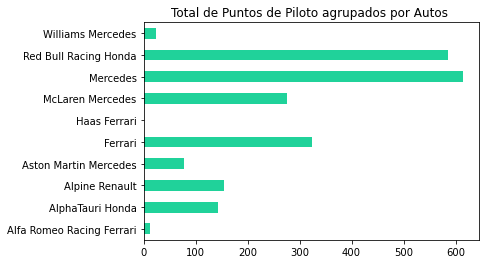

In [17]:
pilotos.groupby("Auto")["Puntos"].sum().plot.barh(title="Total de Puntos de Piloto agrupados por Autos ", legend= False, color= "#20d29a")
plt.ylabel("")
plt.show()

---

In [18]:
escuderia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     10 non-null     int64  
 1   Team    10 non-null     object 
 2   PTS     10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


In [19]:
escuderia.dtypes

Pos       int64
Team     object
PTS     float64
dtype: object

In [20]:
escuderia.columns

Index(['Pos', 'Team', 'PTS'], dtype='object')

In [21]:
escuderia.head(10)

,Pos,Team,PTS
0,1,Mercedes,613.5
1,2,Red Bull Racing Honda,585.5
2,3,Ferrari,323.5
3,4,McLaren Mercedes,275.0
4,5,Alpine Renault,155.0
5,6,AlphaTauri Honda,142.0
6,7,Aston Martin Mercedes,77.0
7,8,Williams Mercedes,23.0
8,9,Alfa Romeo Racing Ferrari,13.0
9,10,Haas Ferrari,0.0


In [22]:
escuderia.set_axis(["Posicion", "Escuderia", "Puntos"], axis=1, inplace=True)
escuderia.columns

Index(['Posicion', 'Escuderia', 'Puntos'], dtype='object')

In [23]:
escuderia.describe()

,Posicion,Puntos
count,10.00000,10.00000
mean,5.50000,220.75000
std,3.02765,226.80881
min,1.00000,0.00000
25%,3.25000,36.50000
50%,5.50000,148.50000
75%,7.75000,311.37500
max,10.00000,613.50000


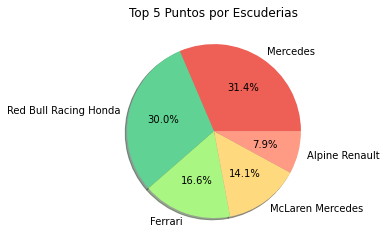

In [24]:
color = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
escuderia["Puntos"].head().plot(kind="pie", 
                                 labels=escuderia["Escuderia"], 
                                 autopct='%0.1f%%', 
                                 title="Top 5 Puntos por Escuderias",
                                 colors=color,
                                 shadow=True)
plt.ylabel("")
plt.show()

---

In [25]:
vuelta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Grand Prix  21 non-null     object
 1   Driver      21 non-null     object
 2   Car         21 non-null     object
 3   Time        21 non-null     object
dtypes: object(4)
memory usage: 800.0+ bytes


In [26]:
vuelta.dtypes

Grand Prix    object
Driver        object
Car           object
Time          object
dtype: object

In [27]:
vuelta.columns

Index(['Grand Prix', 'Driver', 'Car', 'Time'], dtype='object')

In [28]:
vuelta.head()

,Grand Prix,Driver,Car,Time
0,Bahrain,Valtteri Bottas BOT,Mercedes,1:32.090
1,Emilia Romagna,Lewis Hamilton HAM,Mercedes,1:16.702
2,Portugal,Valtteri Bottas BOT,Mercedes,1:19.865
3,Spain,Max Verstappen VER,Red Bull Racing Honda,1:18.149
4,Monaco,Lewis Hamilton HAM,Mercedes,1:12.909


In [29]:
vuelta.set_axis(["Carrera", "Piloto", "Auto", "VueltaRapida"], axis=1, inplace=True)
vuelta.columns

Index(['Carrera', 'Piloto', 'Auto', 'VueltaRapida'], dtype='object')

In [30]:
vuelta.describe()

,Carrera,Piloto,Auto,VueltaRapida
count,21,21,21,21
unique,21,7,4,21
top,Russia,Max Verstappen VER,Mercedes,1:24.812
freq,1,6,10,1


---

## Guardado de datos
Las modificaciones realizadas podemos guardarlas, exportando los datos a csv nuevamente, con lo que pisamos los registros anteriores, asegurandonos asi de que estas modificaciones queden impactadas en los archivos originales que subiremos a SQL.

In [31]:
carreras.to_csv("salida/2021_racesCarreras.csv", index=None, header=True)
pilotos.to_csv("salida/2021_drivers1Pilotos.csv", index=None, header=True)
escuderia.to_csv("salida/2021_team1Equipos.csv", index=None, header=True)
vuelta.to_csv("salida/2021_fastest-laps1Vueltas.csv", index=None, header=True)

---

## Conectamos a Base de Datos MYSQL

In [32]:
# Solo si no disponemos del modulo para MySQL, descomentar la linea de abajo y ejecutar la celda de codigo
#!pip install mysql-connector

#### Probamos la conexión con nuestra base de datos

In [33]:
import mysql.connector

conexion= mysql.connector.connect(host="localhost", user="ispc", password="ProyectoISPC")
print("Conexión correcta")

cursor= conexion.cursor()
cursor.execute("show databases")
for base in cursor:
    print(base)
conexion.close()
print("Conexion cerrada")

Conexión correcta
('bd_dav',)
('dav_curso1',)
('digitalers',)
('information_schema',)
('ispc',)
('laboratorio',)
('labtest1',)
('mysql',)
('performance_schema',)
('phpmyadmin',)
('test',)
Conexion cerrada


Procedemos a crear una tabla desde Python en nuestra base de datos MySQL.

In [34]:
conexion= mysql.connector.connect(host="localhost", user="ispc", password="ProyectoISPC")
print("Conexión correcta")
cursor= conexion.cursor()

sql="use ispc"
cursor.execute(sql)

sql="""CREATE TABLE IF NOT EXISTS `carreras` (
        `IDCarrera`	INTEGER NOT NULL AUTO_INCREMENT,
        `Carrera`	VARCHAR(30),
        `Fecha`		DATE,
        `Ganador`	VARCHAR(30),
        `Auto`		VARCHAR(30),
        `Vueltas`	INTEGER,
        `Tiempo`	TIME,
        PRIMARY KEY (IDCarrera)
        ) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_spanish_ci;
    """
cursor.execute(sql)

sql="""CREATE TABLE IF NOT EXISTS `pilotos` (
      `IDPiloto`	INTEGER NOT NULL AUTO_INCREMENT,
      `Posicion`	INTEGER,
      `Piloto` 				VARCHAR(30),
      `Nacionalidad`		VARCHAR(30),
      `Auto`				VARCHAR(30),
      `Puntos`				INTEGER,
      PRIMARY KEY (IDPiloto)
        ) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_spanish_ci;
    """
cursor.execute(sql)

sql="""CREATE TABLE IF NOT EXISTS `escuderias` (
      `IDEscuderia`	INTEGER NOT NULL AUTO_INCREMENT,
      `Posicion`	INTEGER,
      `Escuderia` 			VARCHAR(30),
      `Puntos`				VARCHAR(30),
      PRIMARY KEY (IDEscuderia)
      ) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_spanish_ci;
    """
cursor.execute(sql)

sql="""CREATE TABLE IF NOT EXISTS `vuelta` (
      `Carrera`				VARCHAR(30),
      `Piloto` 				VARCHAR(30),
      `Auto`				VARCHAR(30),
      `VueltaRapida`		TIME
      ) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_spanish_ci;
    """
cursor.execute(sql)

conexion.commit()
conexion.close()
print("Conexion cerrada")

Conexión correcta
Conexion cerrada


### Carga de registros
La carga puede realizarse de a 1 registro o de a varios; a modo de ejemplo mostraremos la carga para la tabla `carreras`; esta conectividad entre SQL y Python no suele ser siempre las mas adecuada, ya que carece de muchas funcionalidades, pero para unos pocos registros vale la pena el ejemplo. En algunos casos usamos la primera columna como id de la tabla y posee la cualidad auto incremental, por lo que no setearemos el valor de la misma al realizar la carga de registros.
**NOTA:** hay que tener mucho cuidado con esto por si repetimos la carga de un registro, dicha columna continua incrementando su valor.

> Para un solo registro

In [35]:
conexion= mysql.connector.connect(host="localhost", user="ispc", password="ProyectoISPC")
print("Conexión correcta")
cursor= conexion.cursor()

sql="use ispc"
cursor.execute(sql)

sql= "insert into carreras(Carrera, Fecha, Ganador, Auto, Vueltas, Tiempo) values (%s,%s,%s,%s,%s,%s)"
registro= ("Bahrain","2021-03-28","Lewis Hamilton HAM","Mercedes",56,"1:32:03.897")
cursor.execute(sql, registro)
conexion.commit()
print("valor:", cursor.lastrowid)
conexion.close()

Conexión correcta
valor: 1


> Para varios registros

In [36]:
conexion= mysql.connector.connect(host="localhost", user="ispc", password="ProyectoISPC")
print("Conexión correcta")
cursor= conexion.cursor()

sql="use ispc"
cursor.execute(sql)

sql= "insert into carreras(Carrera, Fecha, Ganador, Auto, Vueltas, Tiempo) values (%s,%s,%s,%s,%s,%s)"
registro= [("Emilia Romagna","2021-04-18","Max Verstappen VER","Red Bull Racing Honda",63,"2:02:34.598"),
        ("Portugal","2021-05-02","Lewis Hamilton HAM","Mercedes",66,"1:34:31.421"),
        ("Spain","2021-05-09","Lewis Hamilton HAM","Mercedes",66,"1:33:07.680"),
        ("Monaco","2021-05-23","Max Verstappen VER","Red Bull Racing Honda",78,"1:38:56.820"),
        ("Azerbaijan","2021-06-06","Sergio Perez PER","Red Bull Racing Honda",51,"2:13:36.410"),
        ("France","2021-06-20","Max Verstappen VER","Red Bull Racing Honda",53,"1:27:25.770"),
        ("Styria","2021-06-27","Max Verstappen VER","Red Bull Racing Honda",71,"1:22:18.925"),
        ("Austria","2021-07-04","Max Verstappen VER","Red Bull Racing Honda",71,"1:23:54.543"),
        ("Great Britain","2021-07-18","Lewis Hamilton HAM","Mercedes",52,"1:58:23.284"),
        ("Hungary","2021-08-01","Esteban Ocon OCO","Alpine Renault",70,"2:04:43.199"),
        ("Belgium","2021-08-29","Max Verstappen VER","Red Bull Racing Honda",1,"0:03:27.071"),
        ("Netherlands","2021-09-05","Max Verstappen VER","Red Bull Racing Honda",72,"1:30:05.395"),
        ("Italy","2021-09-12","Daniel Ricciardo RIC","McLaren Mercedes",53,"1:21:54.365"),
        ("Russia","2021-09-26","Lewis Hamilton HAM","Mercedes",53,"1:30:41.001"),
        ("Turkey","2021-10-10","Valtteri Bottas BOT","Mercedes",58,"1:31:04.103"),
        ("United States","2021-10-24","Max Verstappen VER","Red Bull Racing Honda",56,"1:34:36.552"),
        ("Mexico","2021-11-07","Max Verstappen VER","Red Bull Racing Honda",71,"1:38:39.086"),
        ("Brazil","2021-11-14","Lewis Hamilton HAM","Mercedes",71,"1:32:22.851"),
        ("Qatar","2021-11-21","Lewis Hamilton HAM","Mercedes",57,"1:24:28.471"),
        ("Saudi Arabia","2021-12-05","Lewis Hamilton HAM","Mercedes",50,"2:06:15.118"),
        ("Abu Dhabi","2021-12-12","Max Verstappen VER","Red Bull Racing Honda",58,"1:30:17.345")]
cursor.executemany(sql, registro)
conexion.commit()
print("valor:", cursor.lastrowid)
conexion.close()

Conexión correcta
valor: 2


---

Por cuestiones de practicidad el resto de tablas serán llenadas desde MySQL.